In [98]:
#import pandas
import pandas as pd

In [99]:
#load csv
csv = pd.read_csv("co2_emissions.csv")
csv.head(5)

,Country,1990,2005,2017,2021
0,World,22674.116,30049.809,37077.404,37857.58
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59


In [100]:
csv.dtypes

Country     object
1990       float64
2005       float64
2017       float64
2021       float64
dtype: object

In [101]:
# filter op landen met World
# use ~ to reverse the selection --> False
lijst_landen = csv[~csv['Country'].str.contains('World')]
lijst_landen

,Country,1990,2005,2017,2021
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
5,Algeria,65.677,98.197,159.929,173.00
6,Angola,5.851,15.975,30.876,24.45
7,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


In [102]:
#sorteer van hoog naar laag op 2021 waardes
#selecteer top 5
top5 = lijst_landen.sort_values(by='2021', ascending=False).head(5)
top5

,Country,1990,2005,2017,2021
42,China,2397.048,6263.064,10877.218,12466.32
202,United States,5085.897,5971.571,5107.393,4752.08
67,European Union,4409.339,4249.995,3548.345,2774.93
93,India,605968.000,1210.754,2454.774,2648.78
158,Russia,2378.921,1733.950,1764.866,1942.54


In [103]:
top5_pivot= top5.melt(id_vars=["Country"], 
        var_name="Year", 
        value_name="C02")
top5_pivot.head(5)

,Country,Year,C02
0,China,1990,2397.048
1,United States,1990,5085.897
2,European Union,1990,4409.339
3,India,1990,605968.000
4,Russia,1990,2378.921


In [104]:
top5_pivot.dtypes

Country     object
Year        object
C02        float64
dtype: object

Graph 1: CO2 of the bigger countries

Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement). The x-axis should be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years. 

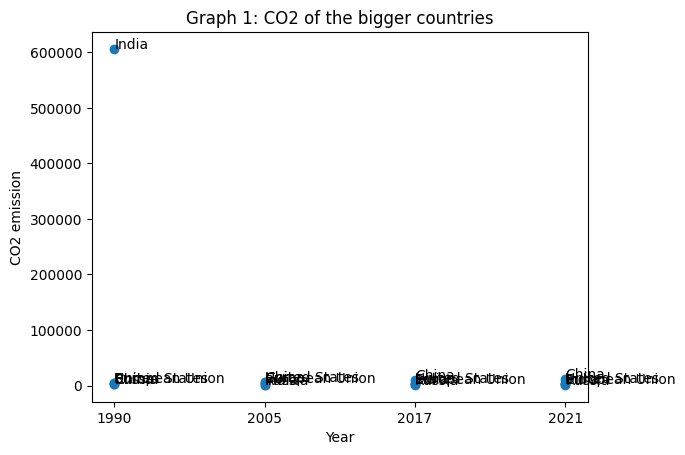

In [105]:

import matplotlib.pyplot as plt

x=top5_pivot["Year"].to_list()
y=top5_pivot["C02"].to_list()
z=top5_pivot["Country"].to_list()




fig, ax = plt.subplots()
ax.scatter(x, y)

plt.title("Graph 1: CO2 of the bigger countries")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 emission")

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))





Graph 2: worst and best changers

Because of climate change it's important that we curb our carbon dioxide emissions. So some countries will have lowered their emissions while others may have increased their emissions. Some countries will have better results in doing this than others. If we calculate the relative change and sort by that change we'll get a list with countries that are changing for the better at one end and countries that are changing less well on the other end.

Find the top three and bottom three countries with regards to lowering these emissions and plot their results.

In [106]:
#sorteer van hoog naar laag op 2021 waardes
#selecteer top 5
lijst_landen['rel1990'] = 100
lijst_landen['rel2005'] = (lijst_landen.loc[:,'2005'] / lijst_landen.loc[:,'1990'] * 100).round(2).copy()
lijst_landen['rel2017'] = (lijst_landen.loc[:,'2017'] / lijst_landen.loc[:,'1990'] * 100).round(2).copy()
lijst_landen['rel2021'] = (lijst_landen.loc[:,'2021'] / lijst_landen.loc[:,'1990'] * 100).round(2).copy()

lijst_landen.drop(['1990','2005','2017','2021'],axis=1,  inplace=True)

lijst_landen


/var/folders/4w/zwnwqrxd0t788rq8sbngxsh00000gn/T/ipykernel_4109/1983232260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lijst_landen['rel1990'] = 100
/var/folders/4w/zwnwqrxd0t788rq8sbngxsh00000gn/T/ipykernel_4109/1983232260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lijst_landen['rel2005'] = (lijst_landen.loc[:,'2005'] / lijst_landen.loc[:,'1990'] * 100).round(2).copy()
/var/folders/4w/zwnwqrxd0t788rq8sbngxsh00000gn/T/ipykernel_4109/1983232260.py:5: SettingWithCopyWarning: 
A value is tryin

,Country,rel1990,rel2005,rel2017,rel2021
3,Afghanistan,100,41.75,448.63,327.97
4,Albania,100,63.74,76.35,69.73
5,Algeria,100,149.52,243.51,263.41
6,Angola,100,273.03,527.70,417.88
7,Anguilla,100,233.33,466.67,500.00
...,...,...,...,...,...
207,Vietnam,100,491.68,1083.78,1592.56
208,Western Sahara,100,157.64,191.67,166.67
209,Yemen,100,316.07,181.54,174.97
210,Zambia,100,83.15,168.09,237.23
